In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns
from sklearn import decomposition
from sklearn.manifold import TSNE

In [9]:
data=pd.read_csv('C:/Users/Sanky27/Downloads/mnist_train.csv')

In [10]:
print(data.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [11]:
label=data['label']

In [12]:
new_label=data.drop('label',axis=1)

In [13]:
print(new_label.shape)
print(new_label)

(42000, 784)
       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9 

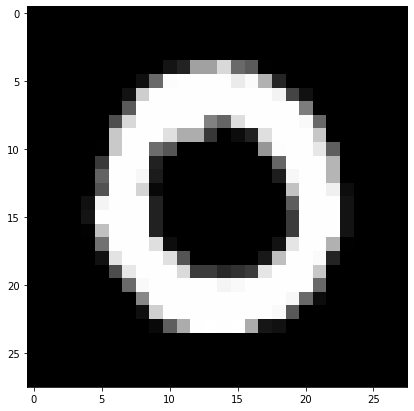

0


In [14]:
plt.figure(figsize=(7,7))
idx=1
grid_data=new_label.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='Greys_r')
plt.show()
print(label[idx])


In [15]:
labels=label.head(42000)
d=new_label.head(42000)
print('shape of data=',d.shape)

shape of data= (42000, 784)


In [16]:
standardised_data=StandardScaler().fit_transform(d)
print(standardised_data.shape)

(42000, 784)


In [17]:
data_42000=standardised_data[0:42000,:]
labels_42000=labels[0:42000]

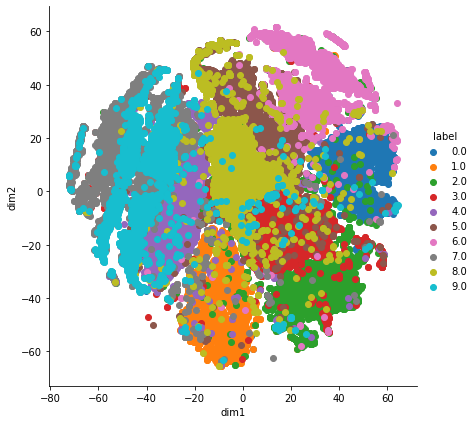

In [18]:
#without perplexity
model=TSNE(n_components=2,random_state=50)
tsne_data=model.fit_transform(data_42000)
tsne_data=np.vstack((tsne_data.T,labels_42000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('dim1','dim2','label'))
sns.FacetGrid(tsne_df,hue='label',height=6).map(plt.scatter,'dim1','dim2').add_legend()
plt.show()

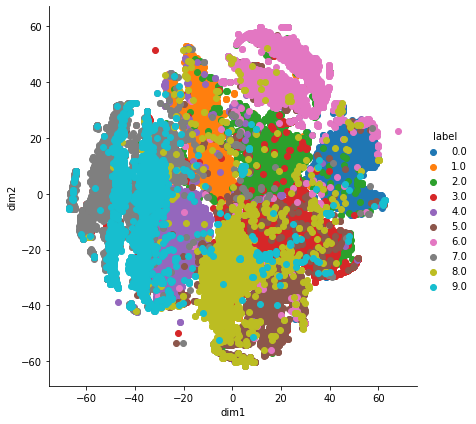

In [19]:
#with perplexity
model=TSNE(n_components=2,random_state=50,perplexity=50)
tsne_data=model.fit_transform(data_42000)
tsne_data=np.vstack((tsne_data.T,labels_42000)).T
tsne_df=pd.DataFrame(data=tsne_data,columns=('dim1','dim2','label'))
sns.FacetGrid(tsne_df,hue='label',height=6).map(plt.scatter,'dim1','dim2').add_legend()
plt.show()